In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [200]:
df = pd.read_csv('task_file.csv')
df

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,3/12/2014,Mortgage,Other mortgage,NaN,NaN,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No
1,1/19/2017,Student loan,Federal student loan servicing,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,No
2,4/6/2018,Credit card or prepaid card,General-purpose credit card or charge card,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,NaN
3,6/8/2014,Credit card,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,Yes
4,9/13/2014,Debt collection,Credit card,NaN,NaN,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
94,2/10/2015,Money transfers,Domestic (US) money transfer,NaN,NaN,MONEYGRAM PAYMENT SYSTEMS WORLDWIDE INC,MI,49022,Web,Closed with monetary relief,Yes,No
95,1/20/2015,Mortgage,Conventional adjustable mortgage (ARM),NaN,NaN,NATIONSTAR MORTGAGE,DE,19901,Web,Closed with explanation,Yes,No
96,8/15/2018,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,NaN,NaN,"CCI Financial, Inc",CA,932XX,Web,Closed with explanation,Yes,NaN
97,1/29/2017,Credit reporting,NaN,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,32003,Web,Closed with non-monetary relief,Yes,No


In [201]:
df.isnull().sum()

Date received                    0
Product                          0
Sub-product                     13
Consumer complaint narrative    83
Company public response         66
Company                          0
State                            1
ZIP code                        10
Submitted via                    0
Company response to consumer     0
Timely response?                 0
Consumer disputed?              24
dtype: int64

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 99 non-null     object
 1   Product                       99 non-null     object
 2   Sub-product                   86 non-null     object
 3   Consumer complaint narrative  16 non-null     object
 4   Company public response       33 non-null     object
 5   Company                       99 non-null     object
 6   State                         98 non-null     object
 7   ZIP code                      89 non-null     object
 8   Submitted via                 99 non-null     object
 9   Company response to consumer  99 non-null     object
 10  Timely response?              99 non-null     object
 11  Consumer disputed?            75 non-null     object
dtypes: object(12)
memory usage: 9.4+ KB


In [203]:
df = df.drop(['Sub-product', 'ZIP code', 'Date received','Company public response'], axis=1)

In [204]:
df= df.dropna(subset=['State'])

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 98
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Product                       98 non-null     object
 1   Consumer complaint narrative  16 non-null     object
 2   Company                       98 non-null     object
 3   State                         98 non-null     object
 4   Submitted via                 98 non-null     object
 5   Company response to consumer  98 non-null     object
 6   Timely response?              98 non-null     object
 7   Consumer disputed?            75 non-null     object
dtypes: object(8)
memory usage: 6.9+ KB


In [206]:
status='mid'
df['Consumer disputed?'] = df['Consumer disputed?'].fillna(status)

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 98
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Product                       98 non-null     object
 1   Consumer complaint narrative  16 non-null     object
 2   Company                       98 non-null     object
 3   State                         98 non-null     object
 4   Submitted via                 98 non-null     object
 5   Company response to consumer  98 non-null     object
 6   Timely response?              98 non-null     object
 7   Consumer disputed?            98 non-null     object
dtypes: object(8)
memory usage: 6.9+ KB


In [208]:
df


,Product,Consumer complaint narrative,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,Mortgage,NaN,M&T BANK CORPORATION,MI,Referral,Closed with explanation,Yes,No
1,Student loan,When my loan was switched over to Navient i wa...,"Navient Solutions, LLC.",LA,Web,Closed with explanation,Yes,No
2,Credit card or prepaid card,I tried to sign up for a spending monitoring p...,CAPITAL ONE FINANCIAL CORPORATION,VA,Web,Closed with explanation,Yes,mid
3,Credit card,NaN,AMERICAN EXPRESS COMPANY,ID,Web,Closed with explanation,Yes,Yes
4,Debt collection,NaN,"CITIBANK, N.A.",VA,Web,Closed with explanation,Yes,Yes
...,...,...,...,...,...,...,...,...
94,Money transfers,NaN,MONEYGRAM PAYMENT SYSTEMS WORLDWIDE INC,MI,Web,Closed with monetary relief,Yes,No
95,Mortgage,NaN,NATIONSTAR MORTGAGE,DE,Web,Closed with explanation,Yes,No
96,"Money transfer, virtual currency, or money ser...",NaN,"CCI Financial, Inc",CA,Web,Closed with explanation,Yes,mid
97,Credit reporting,NaN,Experian Information Solutions Inc.,FL,Web,Closed with non-monetary relief,Yes,No


In [209]:
distinct_state_count = df['State'].nunique()
distinct_state_count

34

In [210]:
distinct_product_count = df['Product'].nunique()
distinct_product_count

11

**EDA**

**4.How successful company is to resolve the complaints? **

In [15]:
df['Consumer disputed?'].value_counts()

No     56
mid    23
Yes    19
Name: Consumer disputed?, dtype: int64

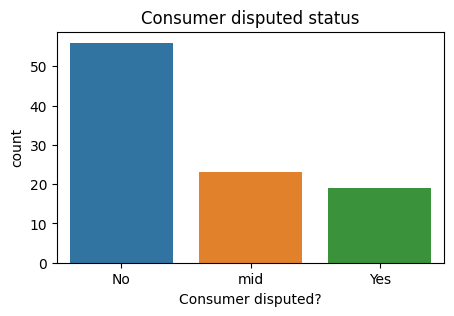

In [16]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.countplot(data=df, x='Consumer disputed?')
plt.title('Consumer disputed status')
plt.show()

In [17]:
Timely_response= pd.crosstab(df['Timely response?'], df['Consumer disputed?'])
print(Timely_response)

Consumer disputed?  No  Yes  mid
Timely response?                
Yes                 56   19   23


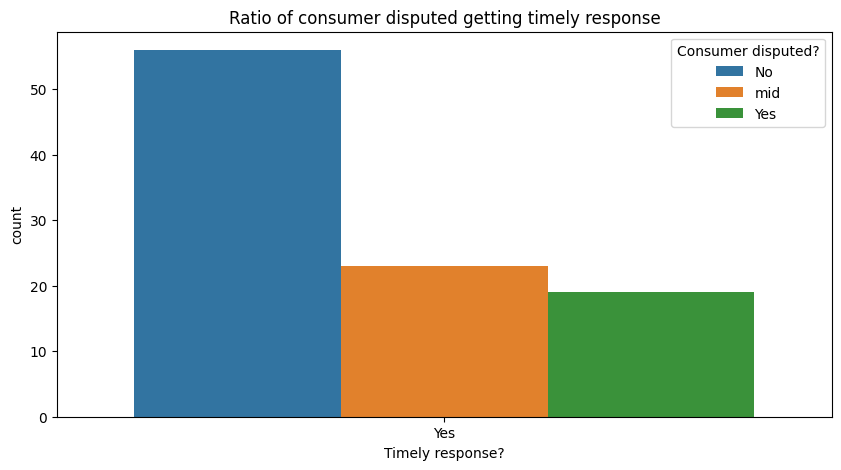

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='Timely response?', hue='Consumer disputed?')
plt.title('Ratio of consumer disputed getting timely response')
plt.show()

In [19]:
print(df['Submitted via'].value_counts())

Web            72
Referral       17
Phone           3
Fax             3
Postal mail     3
Name: Submitted via, dtype: int64


**From which sources most complaints are coming?**

In [20]:
Sources_of_submission = pd.crosstab(df['Submitted via'], df['Consumer disputed?'])
print(Sources_of_submission)

Consumer disputed?  No  Yes  mid
Submitted via                   
Fax                  1    1    1
Phone                3    0    0
Postal mail          3    0    0
Referral            12    5    0
Web                 37   13   22


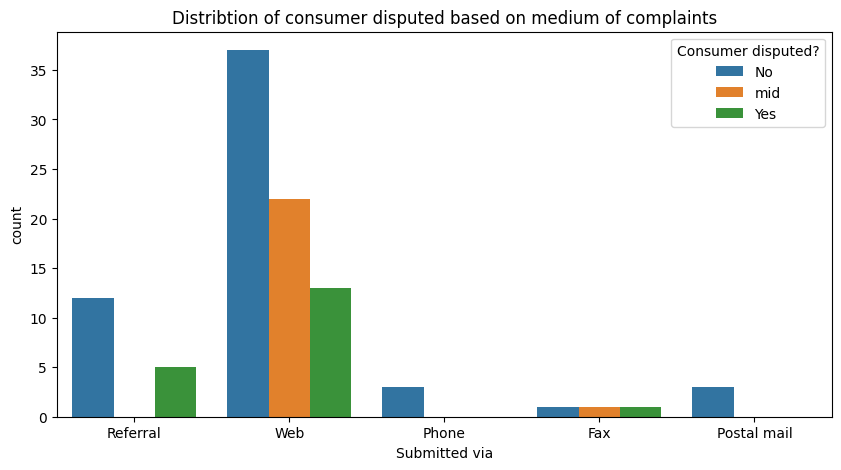

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='Submitted via', hue='Consumer disputed?')
plt.title('Distribtion of consumer disputed based on medium of complaints')
plt.show()

**what are top 5 states from where the most complaints are coming?**

In [22]:
top_states = df['State'].value_counts().head(5)
top_states

CA    15
FL     9
TX     8
GA     6
MD     5
Name: State, dtype: int64

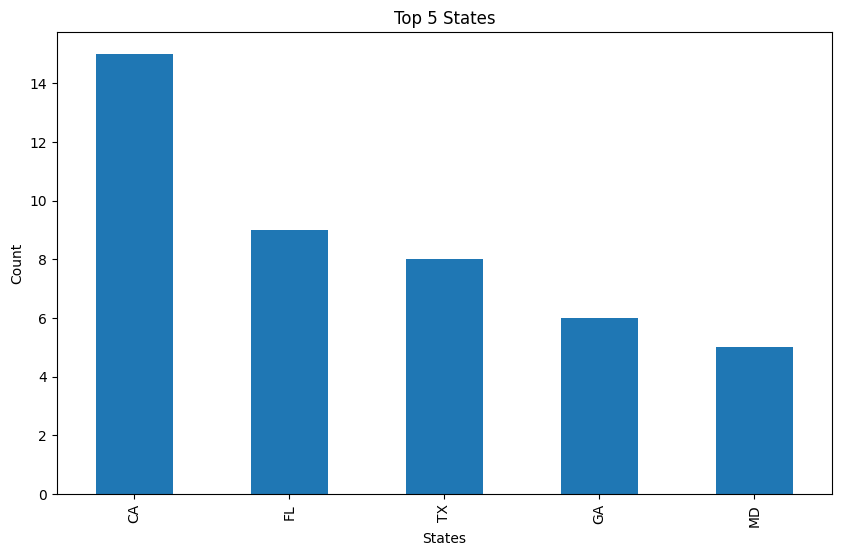

In [23]:
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
top_states.plot(kind='bar')
plt.title('Top 5 States')
plt.xlabel('States')
plt.ylabel('Count')
plt.show()

**Which comapny's customers are doing the most complaints?**

In [24]:
top_Company = df['Company'].value_counts().head(5)
top_Company

Experian Information Solutions Inc.    11
JPMORGAN CHASE & CO.                    6
WELLS FARGO & COMPANY                   6
OCWEN LOAN SERVICING LLC                5
Navient Solutions, LLC.                 4
Name: Company, dtype: int64

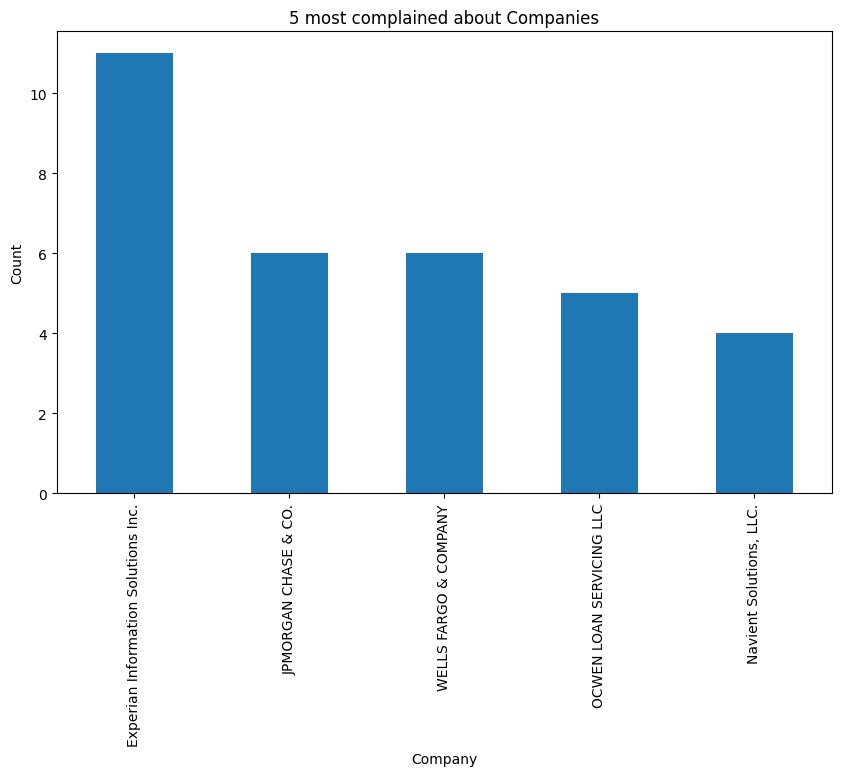

In [25]:
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
top_Company.plot(kind='bar')
plt.title('5 most complained about Companies')
plt.xlabel('Company')
plt.ylabel('Count')
plt.show()

In [26]:
Product_complaints = df['Product'].value_counts()
Product_complaints

Mortgage                                                                        35
Debt collection                                                                 21
Credit reporting                                                                 9
Credit reporting, credit repair services, or other personal consumer reports     9
Bank account or service                                                          8
Student loan                                                                     6
Credit card                                                                      4
Credit card or prepaid card                                                      2
Money transfer, virtual currency, or money service                               2
Consumer Loan                                                                    1
Money transfers                                                                  1
Name: Product, dtype: int64

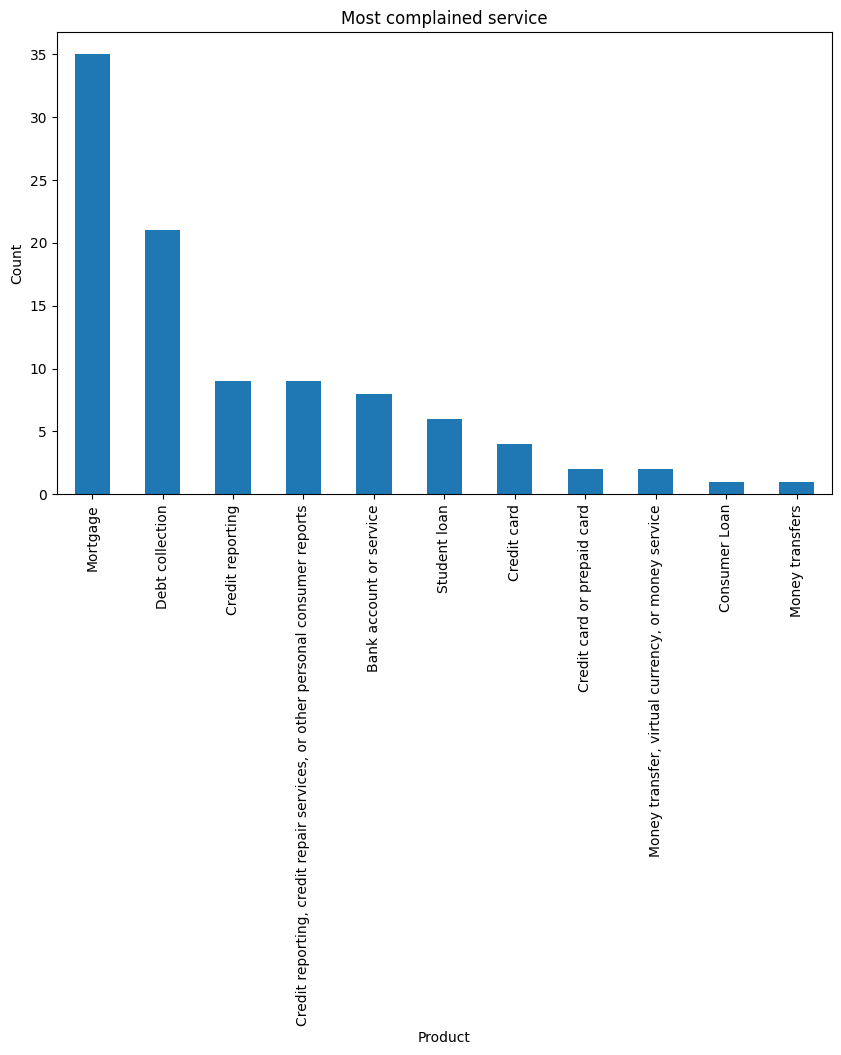

In [27]:
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
Product_complaints.plot(kind='bar')
plt.title('Most complained service')
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()

**Five Business Questions**
1.How successful company is to resolve the complaints?
2.what are top 5 states from where the most complaints are coming?
3 Which 5 comapny's customers are doing the most complaints?
4.Customers of which financial service are doing the most complaints?
5. How company's response is impacting consumer complaints of various products?
 (classification K-NN, SVM, Bernouli)



In [159]:
df_model=df[['Product','Company response to consumer','Consumer disputed?']]
df_model

,Product,Company response to consumer,Consumer disputed?
0,Mortgage,Closed with explanation,No
1,Student loan,Closed with explanation,No
2,Credit card or prepaid card,Closed with explanation,mid
3,Credit card,Closed with explanation,Yes
4,Debt collection,Closed with explanation,Yes
...,...,...,...
94,Money transfers,Closed with monetary relief,No
95,Mortgage,Closed with explanation,No
96,"Money transfer, virtual currency, or money ser...",Closed with explanation,mid
97,Credit reporting,Closed with non-monetary relief,No


In [169]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df_model['Product'] = lb.fit_transform(df['Product'])
df_model['Company response to consumer'] = lb.fit_transform(df['Company response to consumer'])
df_model['Consumer disputed?'] = lb.fit_transform(df['Consumer disputed?'])
df_model

<ipython-input-169-999dcf1ef584>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Product'] = lb.fit_transform(df['Product']).astype(int)
<ipython-input-169-999dcf1ef584>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Company response to consumer'] = lb.fit_transform(df['Company response to consumer']).astype(int)
<ipython-input-169-999dcf1ef584>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,Product,Company response to consumer,Consumer disputed?
0,9,0,0
1,10,0,0
2,3,0,2
3,2,0,1
4,6,0,1
...,...,...,...
94,8,1,0
95,9,0,0
96,7,0,2
97,4,2,0


In [179]:
x = df_model.drop('Consumer disputed?',axis = 1)
y = df_model['Consumer disputed?']

In [180]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x.values,y.values,random_state = 42,test_size= 0.1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(88, 2)
(88,)
(10, 2)
(10,)


In [181]:
from sklearn.neighbors import KNeighborsClassifier

In [182]:
knn1 = KNeighborsClassifier(n_neighbors = 3,p=1)#manhattan
knn2 = KNeighborsClassifier(n_neighbors = 10,p=2)#euclidean

In [183]:
knn1.fit(x_train,y_train)
knn2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [184]:
predk1 = knn1.predict(x_test)
predk2 = knn2.predict(x_test)

In [192]:
from sklearn import metrics
print("Accuracy =" ,metrics.accuracy_score(y_test, predk1))
print("Accuracy =" ,metrics.accuracy_score(y_test, predk2))

Accuracy = 0.4
Accuracy = 0.8


In [193]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
Mn=MultinomialNB()
Bn= BernoulliNB()

In [194]:
Mn.fit(x_train,y_train)
Bn.fit(x_train,y_train)

BernoulliNB()

In [195]:
predb1 = Mn.predict(x_test)
predb2 = Bn.predict(x_test)

In [197]:
from sklearn import metrics
print("Accuracy =" ,metrics.accuracy_score(y_test, predb1))
print("Accuracy =" ,metrics.accuracy_score(y_test, predb2))

Accuracy = 0.7
Accuracy = 0.7


In [198]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report

csvm=LinearSVC()
csvm.fit(x_train,y_train)
predsvm = csvm.predict(x_test)

cr = classification_report(y_test,predsvm)
print("Accuracy =" ,metrics.accuracy_score(y_test, predsvm))

Accuracy = 0.7


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `z

In [136]:
df_nlp=df[['Consumer complaint narrative', 'Consumer disputed?']]
df_nlp

,Consumer complaint narrative,Consumer disputed?
0,NaN,No
1,When my loan was switched over to Navient i wa...,No
2,I tried to sign up for a spending monitoring p...,mid
3,NaN,Yes
4,NaN,Yes
...,...,...
94,NaN,No
95,NaN,No
96,NaN,mid
97,NaN,No


In [137]:
status='The narrative of the consumer is not given in the data'
df_nlp['Consumer complaint narrative'] = df_nlp['Consumer complaint narrative'].fillna(status)

<ipython-input-137-90d98d7d29dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nlp['Consumer complaint narrative'] = df_nlp['Consumer complaint narrative'].fillna(status)


In [138]:
df_nlp

,Consumer complaint narrative,Consumer disputed?
0,The narrative of the consumer is not given in ...,No
1,When my loan was switched over to Navient i wa...,No
2,I tried to sign up for a spending monitoring p...,mid
3,The narrative of the consumer is not given in ...,Yes
4,The narrative of the consumer is not given in ...,Yes
...,...,...
94,The narrative of the consumer is not given in ...,No
95,The narrative of the consumer is not given in ...,No
96,The narrative of the consumer is not given in ...,mid
97,The narrative of the consumer is not given in ...,No


In [139]:
df_nlp.groupby('Consumer disputed?').describe()

Consumer complaint narrative         \
                                          count unique   
Consumer disputed?                                       
No                                           56      6   
Yes                                          19      1   
mid                                          23     12   

                                                                            
                                                                  top freq  
Consumer disputed?                                                          
No                  The narrative of the consumer is not given in ...   51  
Yes                 The narrative of the consumer is not given in ...   19  
mid                 The narrative of the consumer is not given in ...   12

In [140]:
df_nlp['narrative_len']= df_nlp['Consumer complaint narrative'].apply(len)
df_nlp.head()

<ipython-input-140-ad3a79a6cda7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nlp['narrative_len']= df_nlp['Consumer complaint narrative'].apply(len)


,Consumer complaint narrative,Consumer disputed?,narrative_len
0,The narrative of the consumer is not given in ...,No,54
1,When my loan was switched over to Navient i wa...,No,689
2,I tried to sign up for a spending monitoring p...,mid,115
3,The narrative of the consumer is not given in ...,Yes,54
4,The narrative of the consumer is not given in ...,Yes,54


In [141]:
df_nlp['Consumer complaint narrative'] = df_nlp['Consumer complaint narrative'].str.replace(r"XX+\s","")
df_nlp['Consumer complaint narrative'] = df_nlp['Consumer complaint narrative'].str.replace("XXXX","")

<ipython-input-141-0ba22830bf56>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_nlp['Consumer complaint narrative'] = df_nlp['Consumer complaint narrative'].str.replace(r"XX+\s","")
<ipython-input-141-0ba22830bf56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nlp['Consumer complaint narrative'] = df_nlp['Consumer complaint narrative'].str.replace(r"XX+\s","")
<ipython-input-141-0ba22830bf56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nlp

In [142]:
df_nlp['Consumer complaint narrative'][16]

'I few months back I contacted  in regards to fraudulent accounts one being . I sent in the necessary documents affidavit, police report. They removed the account now the account has appeared back on my report under  and allowed that. Dropping my score tremendously'

In [143]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df_nlp['Consumer_disputed_num'] = lb.fit_transform(df['Consumer disputed?'])
df_nlp

<ipython-input-143-d62e3a7f64c7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nlp['Consumer_disputed_num'] = lb.fit_transform(df['Consumer disputed?'])


,Consumer complaint narrative,Consumer disputed?,narrative_len,Consumer_disputed_num
0,The narrative of the consumer is not given in ...,No,54,0
1,When my loan was switched over to Navient i wa...,No,689,0
2,I tried to sign up for a spending monitoring p...,mid,115,2
3,The narrative of the consumer is not given in ...,Yes,54,1
4,The narrative of the consumer is not given in ...,Yes,54,1
...,...,...,...,...
94,The narrative of the consumer is not given in ...,No,54,0
95,The narrative of the consumer is not given in ...,No,54,0
96,The narrative of the consumer is not given in ...,mid,54,2
97,The narrative of the consumer is not given in ...,No,54,0


In [144]:
#df_nlp = df_nlp.sample(frac = 0.5,random_state = 5)
df_nlp.reset_index(inplace = True)

In [145]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import spacy
import pickle
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [146]:
nlp = spacy.load('en_core_web_sm')
### Remove the stop words using spacy predefined list
stop_words = nlp.Defaults.stop_words
#### Create a list of puntuation to be removed
symbols = " ".join(string.punctuation).split(" ")
### As we are doing topic modelling itsa good idea to do lemmatisation - as it uses morphologial analysis
ps = PorterStemmer()
import re
#### Lets define the cleaning function and see how it works
def cleanup_text(docs):
    texts = []
    counter = 1
    for doc in docs:

        if counter % 100 == 0 :
            print ("Processed %d of out of %d documents"% (counter,len(docs)))
        counter =+1
        doc = nlp(doc) ### We are disabling parser as will nt be using it


        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != "-PRON-"]

        tokens =[tok for tok in tokens if tok not in symbols]
        tokens = [tok for tok in tokens if tok not in stop_words]
        tokens = [re.sub('[0-9]', '', i) for i in tokens]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return (pd.Series(texts))

In [147]:
df_nlp['comp_preprocessed'] = cleanup_text(df_nlp['Consumer complaint narrative'])

<ipython-input-147-5187c91d7040>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nlp['comp_preprocessed'] = cleanup_text(df_nlp['Consumer complaint narrative'])


In [148]:
df_nlp[['comp_preprocessed','Consumer complaint narrative']].tail(10)

,comp_preprocessed,Consumer complaint narrative
88,credit report equifax list know belong fix,On the credit report equifax there is a name l...
89,narrative consumer data,The narrative of the consumer is not given in ...
90,narrative consumer data,The narrative of the consumer is not given in ...
91,narrative consumer data,The narrative of the consumer is not given in ...
92,narrative consumer data,The narrative of the consumer is not given in ...
93,narrative consumer data,The narrative of the consumer is not given in ...
94,narrative consumer data,The narrative of the consumer is not given in ...
95,narrative consumer data,The narrative of the consumer is not given in ...
96,narrative consumer data,The narrative of the consumer is not given in ...
97,narrative consumer data,The narrative of the consumer is not given in ...


In [149]:
from sklearn.model_selection import train_test_split

X = df_nlp.comp_preprocessed
y = df_nlp.Consumer_disputed_num
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(98,)
(98,)
(88,)
(88,)
(10,)
(10,)


In [150]:
df_nlp.comp_preprocessed.isnull().sum()

0

In [151]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(X_train)

# learn training data vocabulary, then use it to create a document-term matrix
X_train_dtm = vect.transform(X_train)

# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)


# examine the document-term matrix
print(type(X_train_dtm), X_train_dtm.shape)

# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
print(type(X_test_dtm), X_test_dtm.shape)

<class 'scipy.sparse._csr.csr_matrix'> (88, 435)
<class 'scipy.sparse._csr.csr_matrix'> (10, 435)


In [152]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<88x435 sparse matrix of type '<class 'numpy.float64'>'
	with 845 stored elements in Compressed Sparse Row format>

In [153]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [154]:
y_pred_class = nb.predict(X_test_dtm)

In [155]:
from sklearn import metrics
print("Accuracy =" ,metrics.accuracy_score(y_test, y_pred_class))

# print the confusion matrix
print("Confision Matrix=")
(metrics.confusion_matrix(y_test, y_pred_class))

Accuracy = 0.7
Confision Matrix=


array([[7, 0, 0],
       [1, 0, 0],
       [2, 0, 0]])